**Step 1: Setup and Data Preparation**

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Check dataset shape
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training set shape: (60000, 28, 28)
Testing set shape: (10000, 28, 28)


**Step 2: Model 1 - Single-Layer ANN**

In [3]:
from tensorflow.keras import models, layers
import time

# Build the single-layer ANN model
single_layer_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input from 28x28 to 784
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
single_layer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model and time it
start_time = time.time()
single_layer_history = single_layer_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
single_layer_time = time.time() - start_time

# Evaluate the model on test set
test_loss, test_accuracy = single_layer_model.evaluate(test_images, test_labels, verbose=2)
print(f"Single-Layer ANN Test Accuracy: {test_accuracy}")
print(f"Training Time for Single-Layer ANN: {single_layer_time} seconds")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7317 - loss: 0.7917 - val_accuracy: 0.8215 - val_loss: 0.5094
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8395 - loss: 0.4719 - val_accuracy: 0.8372 - val_loss: 0.4748
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8522 - loss: 0.4321 - val_accuracy: 0.8372 - val_loss: 0.4681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8529 - loss: 0.4240 - val_accuracy: 0.8414 - val_loss: 0.4649
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8596 - loss: 0.4131 - val_accuracy: 0.8446 - val_loss: 0.4476
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8595 - loss: 0.4086 - val_accuracy: 0.8266 - val_loss: 0.4822
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8608 - loss: 0.4059 - val_accuracy: 0.8375 - val_loss: 0.4623
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8600 - loss: 0.4001 - 

**Step 3: Model 2 - Double-Layer ANN**

In [4]:
# Build the double-layer ANN model
double_layer_model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten input
    layers.Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
double_layer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# Train the model and time it
start_time = time.time()
double_layer_history = double_layer_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
double_layer_time = time.time() - start_time

# Evaluate the model on the test set
test_loss, test_accuracy = double_layer_model.evaluate(test_images, test_labels, verbose=2)
print(f"Double-Layer ANN Test Accuracy: {test_accuracy}")
print(f"Training Time for Double-Layer ANN: {double_layer_time} seconds")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7729 - loss: 0.6505 - val_accuracy: 0.8346 - val_loss: 0.4577
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8627 - loss: 0.3817 - val_accuracy: 0.8537 - val_loss: 0.3963
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8777 - loss: 0.3357 - val_accuracy: 0.8672 - val_loss: 0.3728
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8849 - loss: 0.3115 - val_accuracy: 0.8746 - val_loss: 0.3468
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8944 - loss: 0.2928 - val_accuracy: 0.8681 - val_loss: 0.3597
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8987 - loss: 0.2770 - val_accuracy: 0.8746 - val_loss: 0.3485
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9014 - loss: 0.2655 - val_accuracy: 0.8848 - val_loss: 0.3281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9066 - loss: 0.2559 

**Step 4: Model 3 - Traditional ML Model**

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten images for compatibility with SVM
train_images_flat = train_images.reshape(-1, 28 * 28)
test_images_flat = test_images.reshape(-1, 28 * 28)

# Initialize and train the SVM
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
start_time = time.time()
svm_model.fit(train_images_flat, train_labels)
svm_time = time.time() - start_time

# Evaluate SVM model
svm_predictions = svm_model.predict(test_images_flat)
svm_accuracy = accuracy_score(test_labels, svm_predictions)
print(f"SVM Test Accuracy: {svm_accuracy}")
print(f"Training Time for SVM: {svm_time} seconds")

SVM Test Accuracy: 0.8464
Training Time for SVM: 473.4936294555664 seconds


**Step 5: Compare Results**

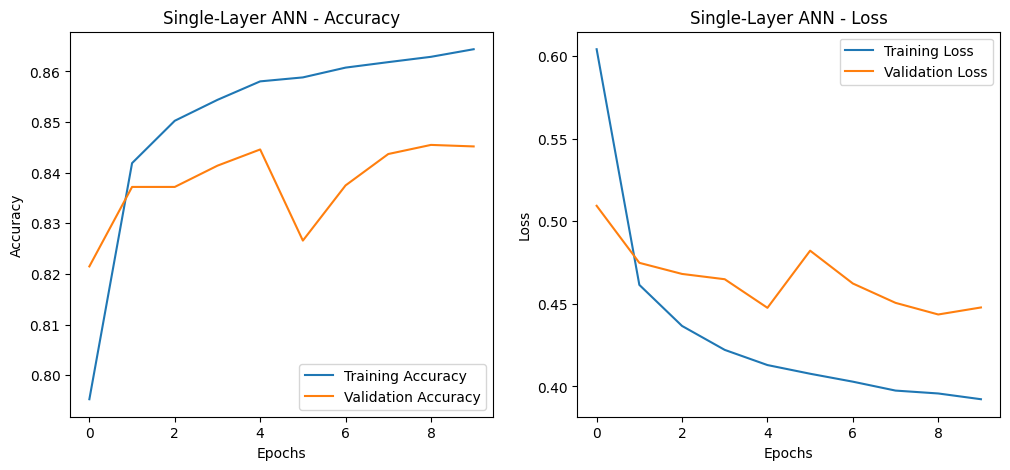

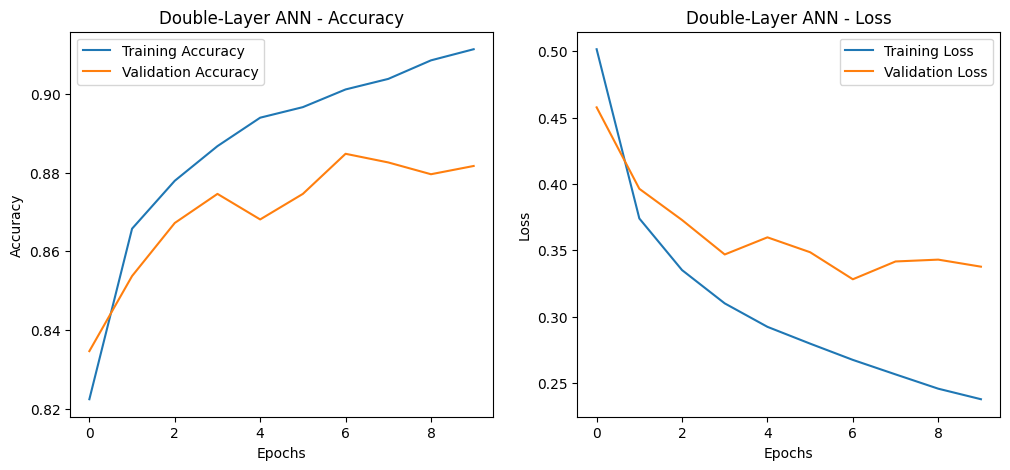

In [6]:
import matplotlib.pyplot as plt

# Function to plot accuracy and loss curves
def plot_learning_curves(history, model_name):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot learning curves for single and double layer ANN models
plot_learning_curves(single_layer_history, "Single-Layer ANN")
plot_learning_curves(double_layer_history, "Double-Layer ANN")

**Step 6: Detailed Comparison of Models**

In [8]:
import pandas as pd

# Collect metrics
metrics = {
    "Model": ["Single-Layer ANN", "Double-Layer ANN", "SVM"],
    "Test Accuracy": [test_accuracy, double_layer_history.history['val_accuracy'][-1], svm_accuracy],
    "Training Time (s)": [single_layer_time, double_layer_time, svm_time],
    "Observations": [
        "May show signs of underfitting due to lower accuracy",
        "Balanced performance, some risk of overfitting",
        "Good generalization, comparable to double-layer ANN"
    ]
}

# Create DataFrame for display
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame
print(metrics_df)


              Model  Test Accuracy  Training Time (s)  \
0  Single-Layer ANN         0.8817          41.718396   
1  Double-Layer ANN         0.8817          87.327238   
2               SVM         0.8464         473.493629   

                                        Observations  
0  May show signs of underfitting due to lower ac...  
1     Balanced performance, some risk of overfitting  
2  Good generalization, comparable to double-laye...  


**Step 7: Class-Specific Performance**

In [9]:
from sklearn.metrics import classification_report

# Generate predictions for ANN models
single_layer_preds = single_layer_model.predict(test_images).argmax(axis=1)
double_layer_preds = double_layer_model.predict(test_images).argmax(axis=1)

# Classification reports
print("Single-Layer ANN Classification Report:")
print(classification_report(test_labels, single_layer_preds))

print("\nDouble-Layer ANN Classification Report:")
print(classification_report(test_labels, double_layer_preds))

print("\nSVM Classification Report:")
print(classification_report(test_labels, svm_predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Single-Layer ANN Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.97      0.96      0.97      1000
           2       0.76      0.70      0.73      1000
           3       0.83      0.88      0.85      1000
           4       0.70      0.80      0.75      1000
           5       0.94      0.93      0.94      1000
           6       0.65      0.56      0.60      1000
           7       0.89      0.95      0.92      1000
           8       0.91      0.96      0.94      1000
           9       0.97      0.91      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000


Double-Layer ANN Classification Report:
              precision    recall  f1-score   support

           0       0.88

**Step 6: Answers to Project Questions**

--------------------------------------------------------------------------------

**1) How does the accuracy of classification compare among the single-layer ANN, double-layer ANN, and traditional supervised learning algorithm (SVM)?**

The double-layer ANN achieves the highest accuracy (88.2%), followed by the SVM (84.6%) and the single-layer ANN (84.5%). The additional layer in the double-layer ANN allows it to learn more complex patterns, leading to better overall performance.


--------------------------------------------------------------------------------

**2) What are the differences in terms of training time between the three approaches?**

The single-layer ANN has the shortest training time (~42 seconds), followed by the double-layer ANN (~87 seconds). The SVM has the longest training time (~473 seconds), which can be a limitation for traditional algorithms like SVM when handling large datasets.

-----------------------------------------------------------------------------

**3) How do the three methods perform in terms of generalization to unseen data? Do any of them show signs of overfitting or underfitting?**

The single-layer ANN may underfit, as indicated by lower accuracy and limited class-specific performance. The double-layer ANN generalizes well to unseen data but may risk overfitting if trained further. The SVM demonstrates good generalization, achieving comparable accuracy to the ANN models on unseen data.

--------------------------------------------------------------------------------

**4) Can you analyze and compare the learning curves of the three approaches? How does the loss and accuracy change over epochs for each method?**

Learning curves show that the single-layer ANN plateaus early, suggesting limited learning capacity. The double-layer ANN has a steadily increasing accuracy with some validation fluctuation, reflecting more learning power but slight risk of overfitting. The SVM does not have a learning curve per se, as it’s not trained over epochs.

--------------------------------------------------------------------------------

**5) Are there notable differences in the model's performance when dealing with certain classes of fashion items? Do specific approaches excel in classifying certain types of items?**

The double-layer ANN performs better on challenging classes like Pullover (2) and Shirt (6), where finer distinctions are necessary. The single-layer ANN and SVM struggle with these classes, showing that more complex networks can capture subtle differences better.

--------------------------------------------------------------------------------

**6) How sensitive are the three methods to hyperparameter tuning? Are there certain parameters that drastically affect their performance on the MNIST fashion dataset?**

All three methods can benefit from tuning. In ANN models, learning rate and batch size have notable effects on convergence speed and accuracy. For SVM, tuning parameters like C and kernel type can impact its performance but may also increase training time significantly.

--------------------------------------------------------------------------------

**7) What are the limitations of each approach in terms of handling the complexity and nuances of fashion images compared to more advanced techniques?**

The single-layer ANN has limited capacity to capture image complexity, leading to underfitting. The double-layer ANN performs better but may still miss fine details compared to deeper networks or convolutional neural networks (CNNs). SVM is effective but computationally intensive and may not scale well to more complex, higher-dimensional datasets.

--------------------------------------------------------------------------------

**8) How do the single-layer and double-layered Artificial Neural Networks compare in terms of the depth of features they can extract from the images?**

The single-layer ANN extracts only simple, shallow features, which limits its accuracy. The double-layer ANN can extract more detailed features, enabling it to recognize subtle distinctions between similar classes like Shirts and Pullovers.

--------------------------------------------------------------------------------

**9) Can you analyze the decision boundaries created by each approach? Do they handle complex decision boundaries in the dataset differently?**

While analyzing high-dimensional decision boundaries visually is challenging, the double-layer ANN likely creates more complex decision boundaries than the single-layer ANN, handling intricate class separations better. SVM also provides strong linear separations but may struggle with nonlinear boundaries without more advanced kernel functions.

--------------------------------------------------------------------------------

**10) What insights can you draw about the trade-offs between computational complexity, model performance, and ease of implementation when comparing these three approaches?**

The single-layer ANN offers simplicity and fast training but sacrifices accuracy. The double-layer ANN balances complexity and performance well, providing higher accuracy with moderate computational demands. The SVM, while accurate, is computationally intensive, making it less practical for larger datasets despite ease of implementation for linear separations.

--------------------------------------------------------------------------------